In [256]:
# github : https://github.com/jimmy9704/GPS-GLASS/tree/main

In [1]:
import os
os.getcwd()

os.chdir('GPS-GLASS')

In [20]:
# evaluate.py 실행을 위한 파일 생성
DATA_DIRECTORY = 'data/images'
DATA_LIST_PATH = [os.path.join(DATA_DIRECTORY,x) for x in sorted(os.listdir(DATA_DIRECTORY))]
DATA_LIST_PATH

['data/images/Screenshot (309).png',
 'data/images/Screenshot (310).png',
 'data/images/Screenshot (311).png',
 'data/images/Screenshot (312).png',
 'data/images/Screenshot (313).png',
 'data/images/Screenshot (314).png',
 'data/images/Screenshot (317).png',
 'data/images/Screenshot (318).png',
 'data/images/Screenshot (319).png',
 'data/images/Screenshot (321).png',
 'data/images/Screenshot (322).png',
 'data/images/Screenshot (323).png',
 'data/images/Screenshot (324).png',
 'data/images/Screenshot (325).png',
 'data/images/Screenshot (326).png',
 'data/images/Screenshot (353).png',
 'data/images/Screenshot (354).png',
 'data/images/Screenshot (355).png',
 'data/images/Screenshot (356).png',
 'data/images/Screenshot (357).png',
 'data/images/Screenshot (358).png',
 'data/images/Screenshot (359).png',
 'data/images/Screenshot (361).png',
 'data/images/Screenshot (362).png',
 'data/images/Screenshot (363).png',
 'data/images/Screenshot (364).png',
 'data/images/Screenshot (366).png',
 

In [21]:
file_name = 'data/images.txt'

with open(file_name, 'w+') as file:
    file.write('\n'.join(DATA_LIST_PATH))

In [3]:
import os
import math
import numpy as np
# import tensorflow as tf
import random
import pickle

from PIL import Image
import matplotlib.pyplot as plt
from skimage.io import imread, imshow,show, imsave
from skimage.transform import resize
from glob import glob

In [2]:
import json

In [4]:
with open(os.path.join('dataset/lists', 'info.json'), 'r') as fp:
    info = json.load(fp)

In [5]:
info.keys()

dict_keys(['classes', 'label2train', 'label', 'palette', 'mean', 'std'])

In [6]:
label = info['label']
color = info['palette']

In [7]:
# colormap 생성
label2color = dict()
color2label = dict()
for (x,y) in list(zip(color, label)):
    print(x,y)
    label2color[y] = tuple(x)
    color2label[tuple(x)] = y

[128, 64, 128] road
[244, 35, 232] sidewalk
[70, 70, 70] building
[102, 102, 156] wall
[190, 153, 153] fence
[153, 153, 153] pole
[250, 170, 30] light
[220, 220, 0] sign
[107, 142, 35] vegetation
[152, 251, 152] terrain
[70, 130, 180] sky
[220, 20, 60] person
[255, 0, 0] rider
[0, 0, 142] car
[0, 0, 70] truck
[0, 60, 100] bus
[0, 80, 100] train
[0, 0, 230] motocycle
[119, 11, 32] bicycle


In [11]:
label2color

{'road': (128, 64, 128),
 'sidewalk': (244, 35, 232),
 'building': (70, 70, 70),
 'wall': (102, 102, 156),
 'fence': (190, 153, 153),
 'pole': (153, 153, 153),
 'light': (250, 170, 30),
 'sign': (220, 220, 0),
 'vegetation': (107, 142, 35),
 'terrain': (152, 251, 152),
 'sky': (70, 130, 180),
 'person': (220, 20, 60),
 'rider': (255, 0, 0),
 'car': (0, 0, 142),
 'truck': (0, 0, 70),
 'bus': (0, 60, 100),
 'train': (0, 80, 100),
 'motocycle': (0, 0, 230),
 'bicycle': (119, 11, 32)}

In [109]:
#segformer 학습 label
seg_id2label = {0 : 'Movable', 1: 'Rider', 2:'My bike', 3:'Road', 4:'Undrivable', 5:'Lanemark'}
seg_id2colors = {
    0: (57, 234, 92),
    1: (65, 117, 6),
    2: (74, 144, 226),
    3: (155, 155, 155),
    4: (245, 166, 35),
    5: (248, 231, 28)
}

In [84]:
# label 변경을 위한 작업 1, class 재부여
translabel=    {'road': 'Road',
     'sidewalk': 'Movable',
     'building': 'Undrivable' ,
     'wall':'Undrivable' ,
     'fence': 'Undrivable',
     'pole': 'Undrivable',
     'light': 'Undrivable',
     'sign': 'Undrivable',
     'vegetation': 'Undrivable',
     'terrain': 'Undrivable',
     'sky': 'Undrivable',
     'person': 'Movable' ,
     'rider': 'Rider',
     'car': 'Movable',
     'truck': 'Movable',
     'bus':'Movable' ,
     'train': 'Movable',
     'motocycle': 'Movable',
     'bicycle': 'Movable'}

In [86]:
from skimage.transform import resize
from tqdm import tqdm

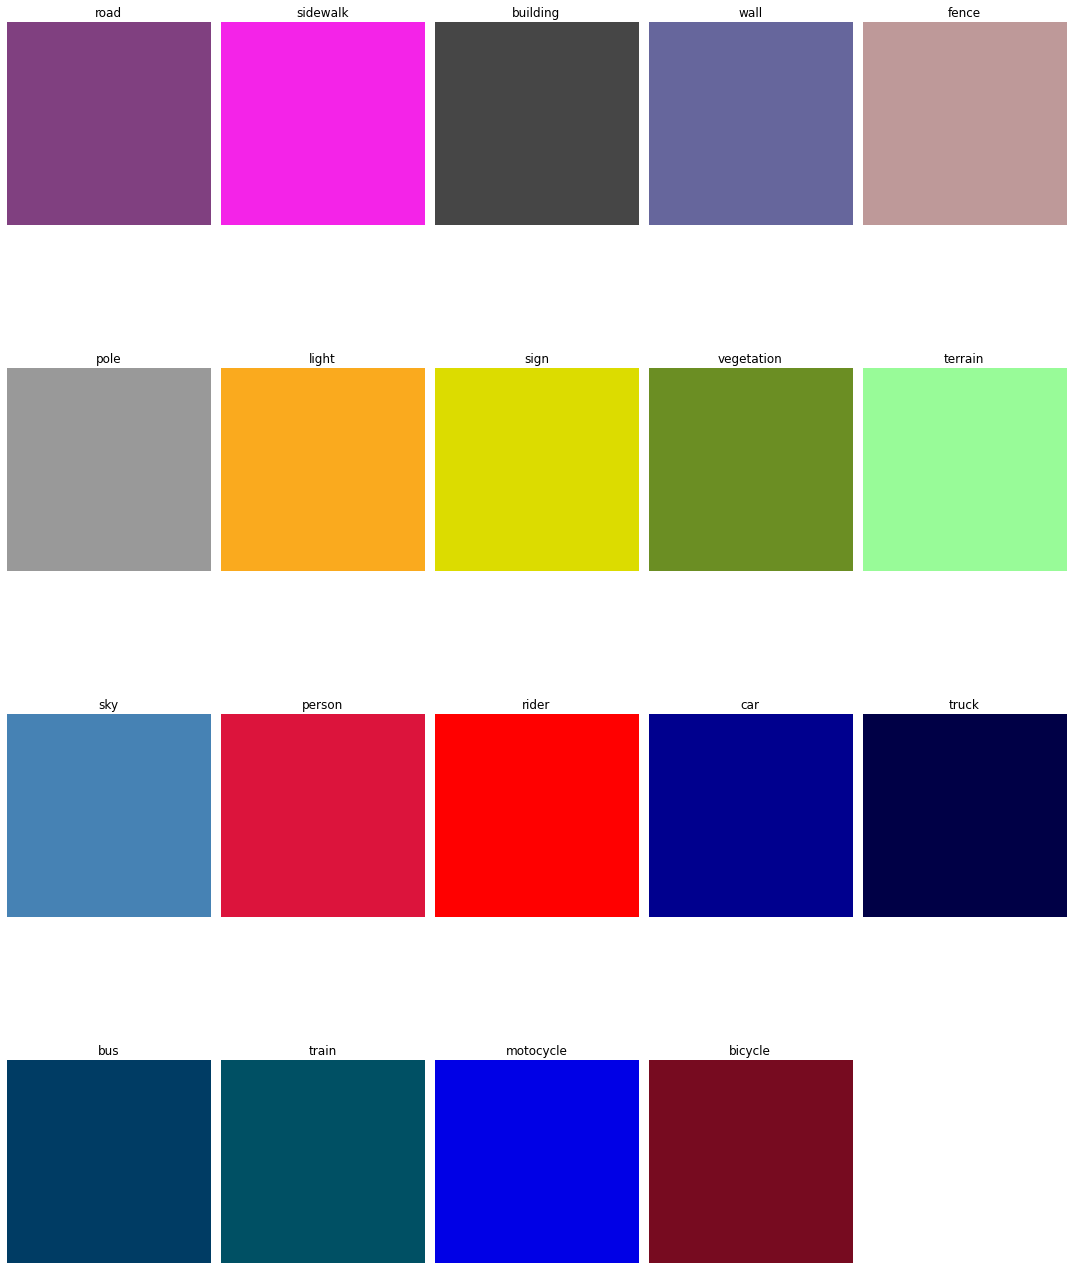

In [70]:
# 각 클래스 별로 서브플롯에 그릴 그래프 설정
plt.figure(figsize=(15, 20))
for i, (class_id, colormap) in enumerate(label2color.items()):
    ax = plt.subplot(4, 5, i + 1)
    ax.set_title(f"{class_id}")
    ax.imshow(np.full((3, 3, 3), colormap, dtype=np.uint8))
    ax.axis('off')

plt.tight_layout()
plt.show()

weight는 있으므로 예측만 수행하면 됨

명령어:
```cmd
python evaluate.py
```

In [ ]:
# 빠른 예측을 위한 data resizing

In [17]:
data_dir = 'data/images'
label_dir = 'data/semantic'

In [19]:
## resize

files = glob(data_dir+'/*')
for f in files:
    title, ext = os.path.splitext(f)
    if ext in ['.png']:
        img = imread(f)[:3] # alpha 삭제
        img_resize = resize(img,(224, 224))
        imsave(title+ext,img_resize)
        
files = glob(label_dir+'/*')
for f in files:
    title, ext = os.path.splitext(f)
    if ext in ['.png']:
        img = imread(f)[:3]
        img_resize = resize(img,(224, 224))
        imsave(title+ext,img_resize)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:9: UserWarning: data/images/Screenshot (397).png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 t

/tmp/ipykernel_81/2510688191.py:9: UserWarning: data/images/night ride (31).png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:9: UserWarning: data/images/night ride (98).png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:9: UserWarning: data/images/night ride (95).png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:9: UserWarning: data/images/Screenshot (318).png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:9: UserWarning: data/images/night ride (15).png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:9: UserWarning: data/images/night ride (48).png is a low contrast image
  imsave(title+ext,img_resize)

/tmp/ipykernel_81/2510688191.py:9: UserWarning: data/images/night ride (94).png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:9: UserWarning: data/images/night ride (9).png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion 

/tmp/ipykernel_81/2510688191.py:9: UserWarning: data/images/night ride (81).png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (26).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (99).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to savin

/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (396).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (444).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (61).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (33).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range

/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (100).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (392).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (95).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (356).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Rang

/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (87).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (425).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (443).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (39).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range

/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (29).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (387).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (42).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (376).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range

/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (93).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (411).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (58).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (424).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range

/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (364).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (17).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/night ride (77).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_81/2510688191.py:18: UserWarning: data/semantic/Screenshot (407).png___fuse.png is a low contrast image
  imsave(title+ext,img_resize)
Lossy conversion from float64 to uint8. Range

In [56]:
mask_dir = 'result/GPS-GLASS/PSPNet/'

In [57]:
len(os.listdir(mask_dir))

400

In [227]:
## 예측 mask 실제 이미지, mask와 확인

In [73]:
# integer로 구성된 mask와 RGB color mask 둘다 생성하여 file명 분리 저장
color_mask = glob(mask_dir + '*_color.png')
integer_mask = [mask_dir+ x for x in os.listdir(mask_dir) if mask_dir + x not in color_mask]

len(color_mask), len(integer_mask)

(200, 200)

In [74]:
color_mask.sort()
integer_mask.sort()

In [75]:
data = [ _ for _ in zip(color_mask, integer_mask)]

In [236]:
color, integer = data[107]

In [237]:
color

'result/GPS-GLASS/PSPNet/night ride (10)_color.png'

In [238]:
integer

'result/GPS-GLASS/PSPNet/night ride (10).png'

In [239]:
c_mask = imread(color)
i_mask = imread(integer)

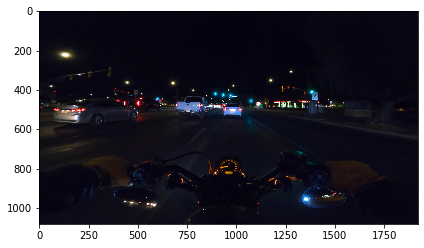

In [240]:
imshow(imread(data_dir+f"/{os.path.splitext(integer)[0].split('/')[-1]}.png"))
show()

In [252]:
label_dir+f"/{os.path.splitext(integer)[0].split('/')[-1]}__fuse.png"

'result/GPS-GLASS/PSPNet/night ride (10)__fuse.png'

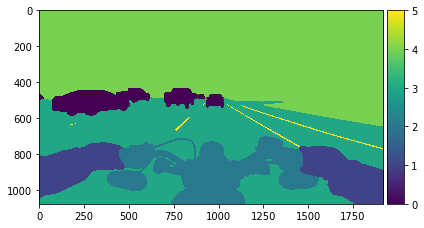

In [254]:
imshow(imread(mask_dir+f"/{os.path.splitext(integer)[0].split('/')[-1]}__fuse.png"))
plt.show()

In [255]:
#실제 예측 mask

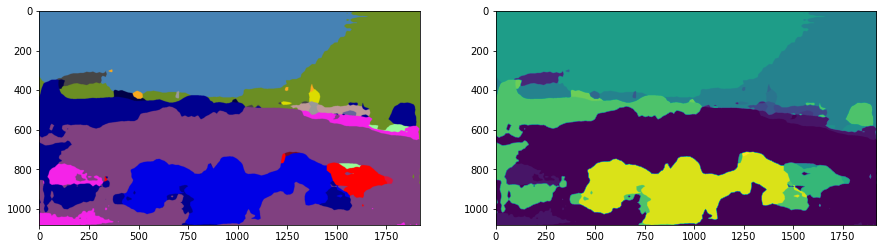

In [242]:
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
plt.imshow(c_mask) # color mask
plt.subplot(1, 2, 2)
plt.imshow(i_mask) # integer mask
plt.show()

In [226]:
# 단편적인 결과만 확인했을 떄는 좀더 segmentation 성능이 좋은 것으로 생각됨

In [183]:
# color와 interger 에 대한 연결 정보가 없어 임의의 몇 데이터를 통하여 integer2color로 연결되는 dictionary 생성
for n in range(100):
    color, integer = data[n]
    c_mask = imread(color)
    i_mask = imread(integer)
    # int2label = dict()
    unique_labels = np.unique(i_mask)
    for label in unique_labels:
        if label in int2label.keys(): 
            continue

        print(label,' added')
        int2label[label] = tuple(c_mask[i_mask == label][0][:3])
    #     print(tuple(c_mask[i_mask == label][0][:3]))
    #     break
    if len(int2label) == 19:
        break

16  added


In [186]:
label2int = {v:k for k, v in int2label.items()}
label2int

{(128, 64, 128): 0,
 (244, 35, 232): 1,
 (70, 70, 70): 2,
 (102, 102, 156): 3,
 (190, 153, 153): 4,
 (153, 153, 153): 5,
 (250, 170, 30): 6,
 (220, 220, 0): 7,
 (107, 142, 35): 8,
 (152, 251, 152): 9,
 (70, 130, 180): 10,
 (220, 20, 60): 11,
 (255, 0, 0): 12,
 (0, 0, 142): 13,
 (0, 0, 70): 14,
 (0, 0, 230): 17,
 (119, 11, 32): 18,
 (0, 60, 100): 15,
 (0, 80, 100): 16}

In [187]:
# segformer에서 사용한 colormap->id(class)
seg_color2id = {v:k for k, v in seg_id2colors.items()}
seg_color2id

{(57, 234, 92): 0,
 (65, 117, 6): 1,
 (74, 144, 226): 2,
 (155, 155, 155): 3,
 (245, 166, 35): 4,
 (248, 231, 28): 5}

In [192]:
[seg_id2label[x] for x in [2,5,]] 
# 2가지 정보에 대한 데이터 없음
# my bike라고 특정되어 있어 motocycle class에 적용시키지 않음

['My bike', 'Lanemark']

In [190]:
# 위에서 작성했었던 label, class_id, colormap 정보를 종합하여 class id 전환을 위한 dictionary 생성
color_transfer = {label2color[key] :class_colors[label2id[translabel[key]]] for key in label2color.keys()}
color_transfer = {label2int[k]: seg_color2id[v] for k,v in color_transfer.items()}
color_transfer

{0: 3,
 1: 0,
 2: 4,
 3: 4,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 4,
 9: 4,
 10: 4,
 11: 0,
 12: 1,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0}

In [ ]:
# task dataset에 맞춘 mask 생성

In [193]:
def apply_color_transfer(value): # 일괄적용을 위한 함수 작성
    return color_transfer.get(value, value)

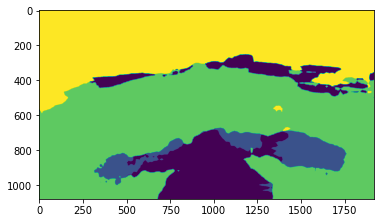

In [194]:
transformed_mask = np.vectorize(apply_color_transfer)(i_mask)
plt.imshow(transformed_mask) # 예측 mask
plt.show()

In [200]:
mask = imread(label_dir+f"/{os.path.splitext(data[8][1])[0].split('/')[-1]}.png___fuse.png")

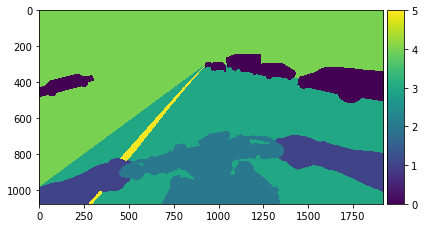

In [208]:
def convert_mask(mask_4d, seg_color2id = seg_color2id): 
    h, w, _ = mask_4d.shape
    mask_2d = np.zeros((h, w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            rgb = tuple(mask_4d[i, j, :3])
            class_id = seg_color2id.get(rgb, 0)  # 255는 unknown을 나타냄
            mask_2d[i, j] = class_id
    return mask_2d
imshow(convert_mask(mask))
plt.show()

In [217]:
import warnings
from tqdm import tqdm

# 경고 메시지 무시 설정
warnings.simplefilter("ignore", category=UserWarning)

In [219]:
def convert_mask_png(image_path, seg_color2id):
    image = Image.open(image_path)
    mask_4d = np.array(image)
    h, w, _ = mask_4d.shape
    mask_2d = np.zeros((h, w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            rgb = tuple(mask_4d[i, j, :3])
            class_id = seg_color2id.get(rgb, 0)  # 255는 unknown을 나타냄
            mask_2d[i, j] = class_id
    return Image.fromarray(mask_2d.astype(np.uint8))

In [220]:
# label_dir 디렉토리 내의 모든 파일에 대해 작업 수행
for filename in tqdm(os.listdir(label_dir)):
    if filename.endswith(".png"):  # 파일 확장자가 .png인 경우에만 처리
        input_path = os.path.join(label_dir, filename)
        output_path = os.path.join(label_dir, filename.replace(".png_", ""))
        
        mask_2d = convert_mask_png(input_path, seg_color2id)
        
        mask_2d.save(output_path)

100%|██████████| 200/200 [39:54<00:00, 11.97s/it]


In [223]:
import cv2

In [221]:
def apply_color_transfer_to_image(image):
    transformed_image = np.vectorize(apply_color_transfer)(image)
    return transformed_image

In [224]:
# integer mask 값 변환을 일괄적으로 진행
for filename in tqdm(integer_mask):
    if filename.endswith(".png"):
        # 이미지 파일 읽어오기
        image = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
        
        # 변환 적용
        transformed_image = apply_color_transfer_to_image(image)
        
        # 변환된 이미지 저장
        output_path = filename.replace('.png','_sf.png')
        cv2.imwrite(output_path, transformed_image)
#         print(f"Processed: {filename}")

100%|██████████| 200/200 [10:36<00:00,  3.18s/it]


In [228]:
# calculate_miou_for_rider.py 작성하여 계산을 ipynb외의 코드로 수행

In [229]:
# 디렉토리 경로
mask_dir = "data/semantic"
label_dir = "result/GPS-GLASS/PSPNet"

# 파일 목록 가져오기
mask_files = sorted([f for f in os.listdir(mask_dir) if '.png_' not in f])
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith("_sf.png")])

In [230]:
pixel_acc = []

In [233]:
# 이미지 파일 별로 처리
for mask_file, label_file in tqdm(zip(mask_files, label_files)):
    mask_path = os.path.join(mask_dir, mask_file)
    label_path = os.path.join(label_dir, label_file)
    
    # 이미지 파일 불러오기
    mask = np.array(Image.open(mask_path))
    label = np.array(Image.open(label_path))
    
    # 정확하게 예측된 픽셀 수 계산
    accurate_pixels = np.sum(label == mask)

    # 전체 픽셀 수
    total_pixels = mask.shape[0] * mask.shape[1]

    # 픽셀 정확도 계산
    pixel_accuracy = accurate_pixels / total_pixels
    
    pixel_acc.append(pixel_accuracy)

198it [00:06, 29.38it/s]


In [235]:
np.mean(pixel_acc),np.std(pixel_acc)

(0.5778240399753709, 0.10737709733288785)

<center><b> mIOU 계산 결과 </b></centter>

|Class |IOUs|
|:--|--:|
|Movable| 0.0832|
|Rider| 0.1418|
|My bike| 0.0000|
|Road| 0.4670|
|Undrivable| 0.7668|
|Lanemark| 0.0000|
|**mIOU**|**0.2432**|


<center> 데이터가 없던 my bike와 lanemark를 빼게 된다면, 0.459 정도의 mIOU가 도출됨 </centter>
<center> 생각보다 성능이 낮았지만 데이터가 없던 부분에서 깎인 것이 꽤 크다고 판담됨 </centter>
<center> SegFormer b5과 유사한 정도가 되지 않았을까 예상 </centter>